# Kernelized Stochastic Gradient Descent

In [2]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn aesthetics
sns.despine()
sns.set(color_codes=True)
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 1.5})
sns.set_style("whitegrid")

/Users/alvinwan/anaconda3/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


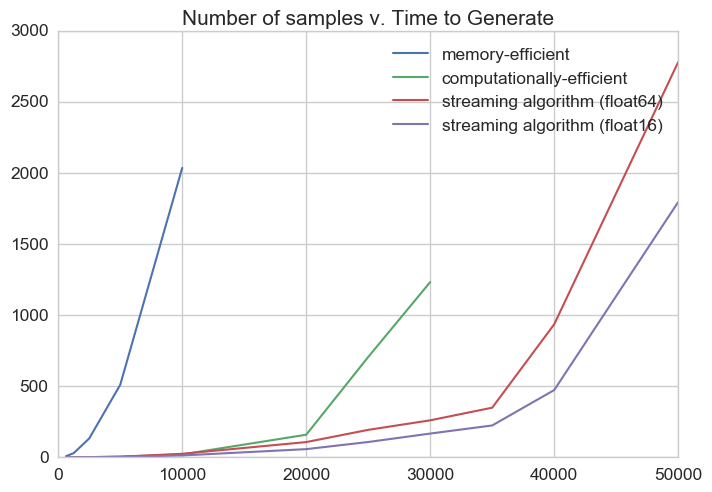

In [4]:
plt.title('Number of samples v. Time to Generate')
plt.plot((625, 1250, 2500, 5000, 10000), (7.23, 29.28, 132.44, 510.00, 2036.50), label='memory-efficient')
plt.plot((625, 1250, 2500, 5000, 10000, 20000, 25000, 30000), (0.13, 0.33, 1.25, 3.95, 20.33, 158.73, 706.01, 1233.27), label='computationally-efficient')
plt.plot((625, 1250, 2500, 5000, 10000, 20000, 25000, 30000, 35000, 40000, 50000), (0.16, 0.36, 1.12, 4.10, 24.49, 106.99, 193.04, 260.11, 349.11, 936.15, 2781.95), label='streaming algorithm (float64)')
plt.plot((625, 1250, 2500, 5000, 10000, 20000, 25000, 30000, 35000, 40000, 50000), (0.14, 0.23, 0.62, 2.79, 12.80, 57.33, 107.53, 166.93, 223.97, 473.20, 1796.86), label='streaming algorithm (float16)')
plt.legend()

In [3]:
YS = ('i', 'Time', 'Loss', 'Train Accuracy', 'Test Accuracy')
DIR = '../logs/'
titles = (
    "Streaming SGD for CIFAR-10",
    "Kernelized SGD for CIFAR-10",
    "Streaming SGD for MNIST",
    "Kernelized SGD for MNIST"
)

In [4]:
def load_data(plots):
    iters, times, ys = [], [], []
    for i, filepath in enumerate(plots):
        iters.append([])
        times.append([])
        ys.append([])
        with open(filepath) as f:
            print(filepath)
            next(f)
            for line in csv.reader(f):
                iters[i].append(int(line[0]))
                times[i].append(float(line[1]))
                ys[i].append((float(line[2]), float(line[3]), float(line[4])))
    return iters, times, ys

In [5]:
def plot_x_v_trait(prefix, start, end, trait_index, label_index, xs):
    plt.figure(figsize=(8, 6), dpi=80)
    plt.title(prefix)
    for i, (title, plot) in enumerate(zip(titles[start: end], plots[start: end]), start=start):
        plt.plot(xs[i], [t[trait_index] for t in ys[i]], label=YS[label_index] + ' : ' + title)
    plt.legend(loc='lower right')
    plt.show()

def plot_iterations_v_trait(prefix, start, end, trait_index, label_index):
    plot_x_v_trait(prefix, start, end, trait_index, label_index, iters)
    
def plot_time_v_trait(prefix, start, end, trait_index, label_index):
    plot_x_v_trait(prefix, start, end, trait_index, label_index, times)

# Iterations

In [37]:
ITERS_SSGD_CIFAR_10_FILEPATH = DIR + 'ssgd/run-1482651060.893781.csv'
ITERS_KSGD_CIFAR_10_FILEPATH = DIR + 'sgd/run-1482650689.917903.csv'
ITERS_SSGD_MNIST_FILEPATH = DIR + 'ssgd/run-1482482494.692054.csv'
ITERS_KSGD_MNIST_FILEPATH = DIR + 'sgd/run-1482636424.840313.csv'

plots = (
    ITERS_SSGD_CIFAR_10_FILEPATH,
    ITERS_KSGD_CIFAR_10_FILEPATH,
    ITERS_SSGD_MNIST_FILEPATH,
    ITERS_KSGD_MNIST_FILEPATH
)

In [38]:
iters, times, ys = load_data(plots)

../logs/ssgd/run-1482651060.893781.csv
../logs/sgd/run-1482650689.917903.csv
../logs/ssgd/run-1482482494.692054.csv
../logs/sgd/run-1482636424.840313.csv


# Iterations v. Accuracy

In [39]:
# Plot iterations v. accuracy (both train and test) for each approach

def plot_iterations_v_train_accuracy(start, end):
    plot_iterations_v_trait("Iterations v. Train Accuracy: ", start, end, 1, 3)
    
def plot_iterations_v_test_accuracy(start, end):
    plot_iterations_v_trait("Iterations v. Test Accuracy: ", start, end, 2, 4)

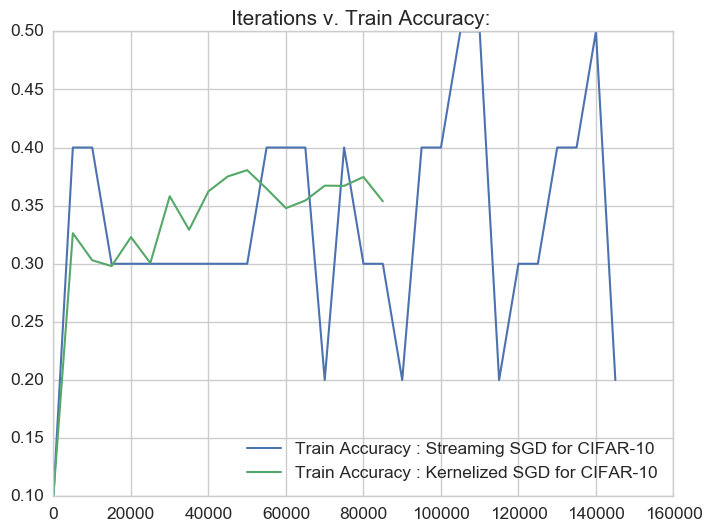

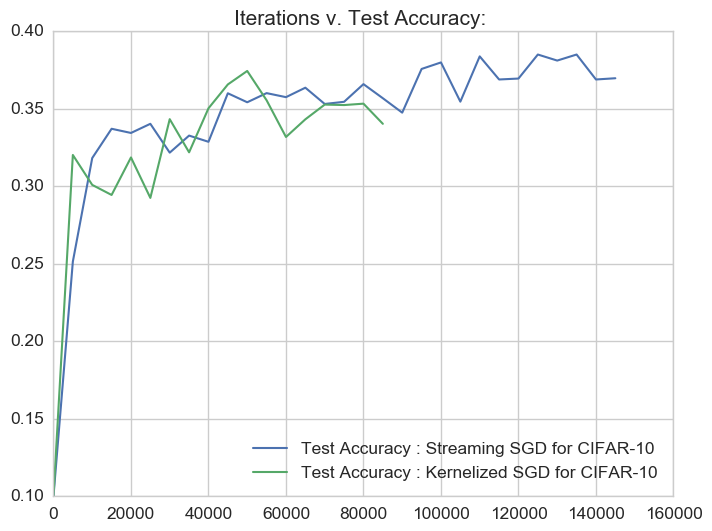

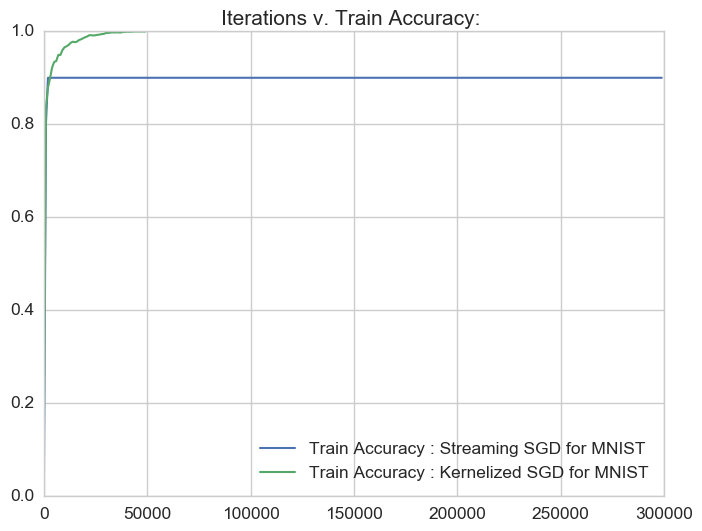

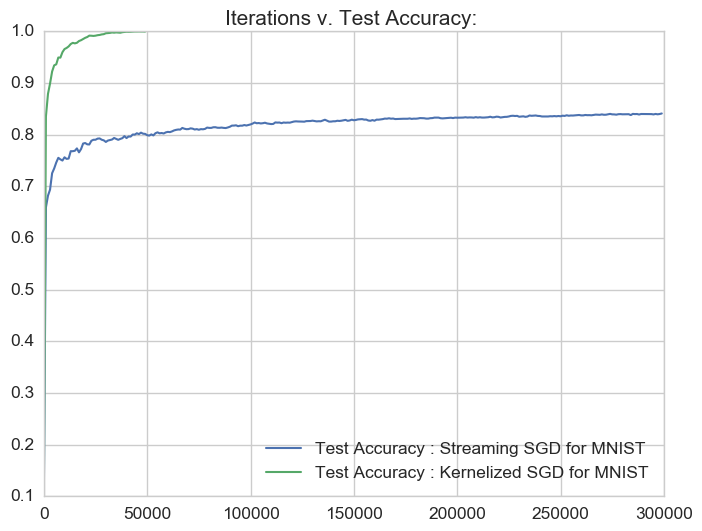

In [40]:
plot_iterations_v_train_accuracy(0, 2)  # CIFAR-10
plot_iterations_v_test_accuracy(0, 2)  # CIFAR-10
plot_iterations_v_train_accuracy(2, 4)  # MNIST
plot_iterations_v_test_accuracy(2, 4)  # MNIST

# Time v. Accuracy

In [41]:
# Plot time v. accuracy (both train and test) for each approach
def plot_time_v_train_accuracy(start, end):
    plot_time_v_trait("Time v. Train Accuracy: ", start, end, 1, 3)
    
def plot_time_v_test_accuracy(start, end):
    plot_time_v_trait("Time v. Test Accuracy: ", start, end, 2, 4)

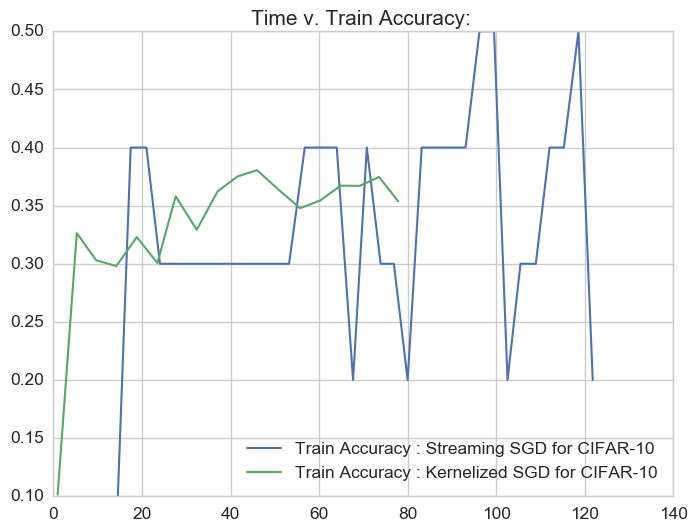

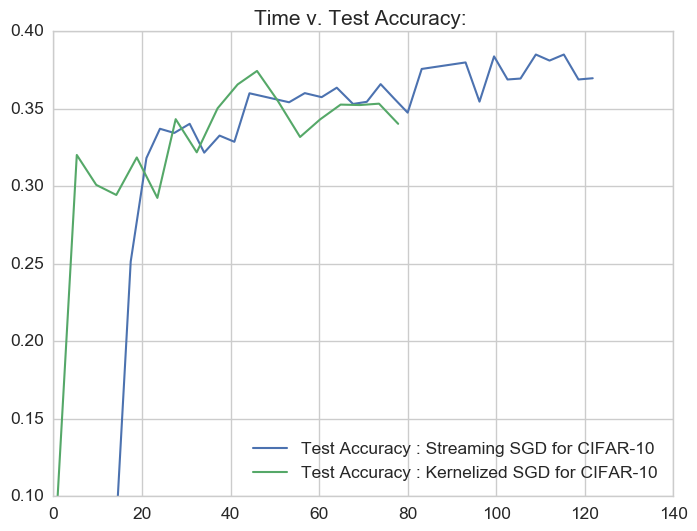

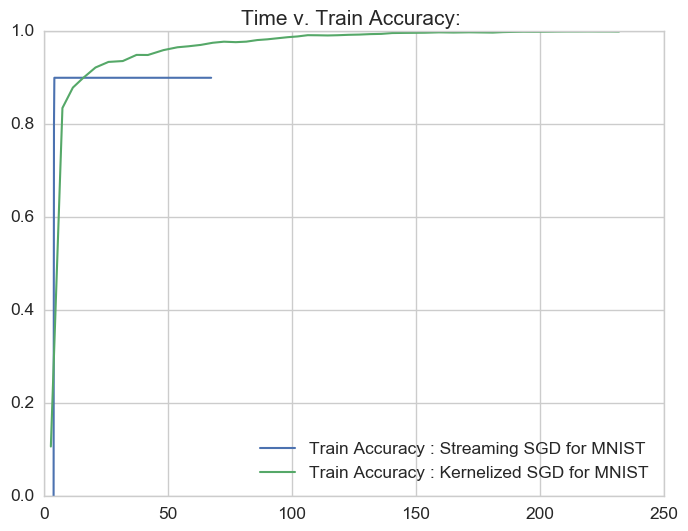

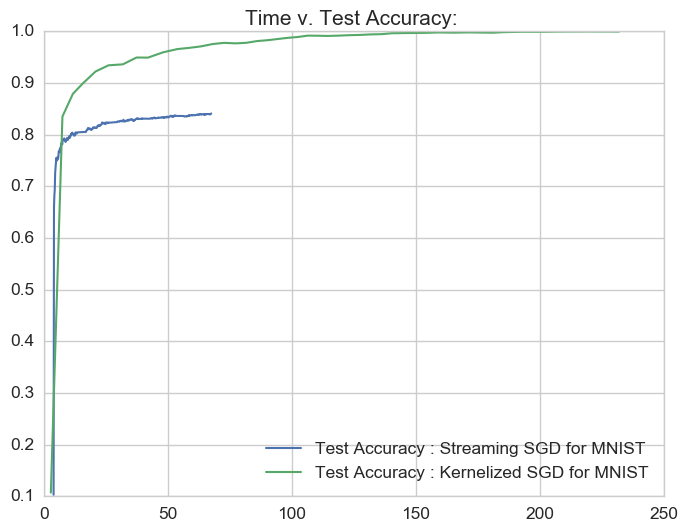

In [42]:
plot_time_v_train_accuracy(0, 2)  # CIFAR-10
plot_time_v_test_accuracy(0, 2)  # CIFAR-10
plot_time_v_train_accuracy(2, 4)  # MNIST
plot_time_v_test_accuracy(2, 4)  # MNIST

# Iterations v. Loss

In [43]:
# Plot iterations v. loss for each approach
def plot_iterations_v_loss(start, end):
    plot_iterations_v_trait("Iterations v. Loss: ", start, end, 0, 0)

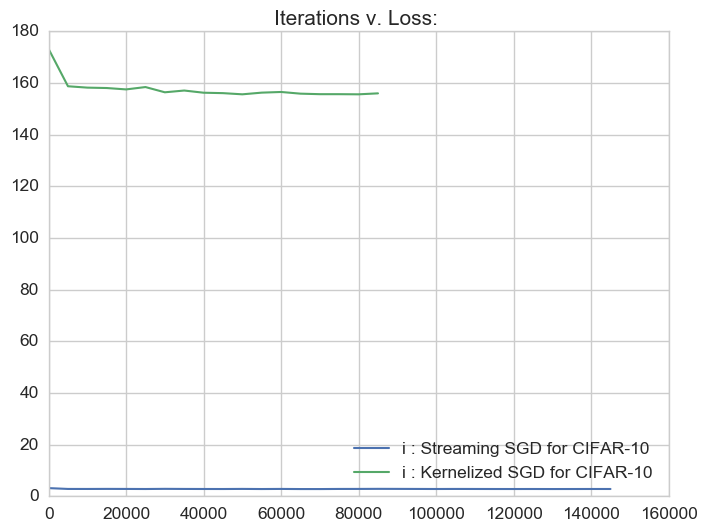

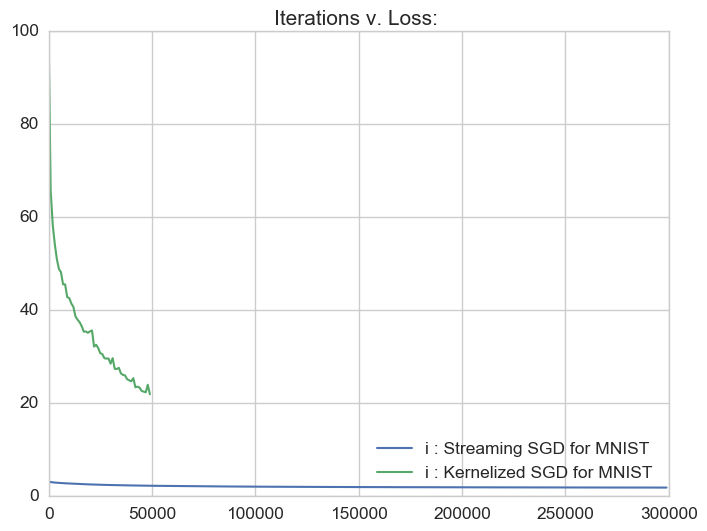

In [44]:
plot_iterations_v_loss(0, 2)  # CIFAR-10
plot_iterations_v_loss(2, 4)  # MNIST

# Time v. Loss

In [45]:
# Plot time v. loss for each approach
def plot_time_v_loss(start, end):
    plot_time_v_trait("Time v. Loss: ", start, end, 0, 0)

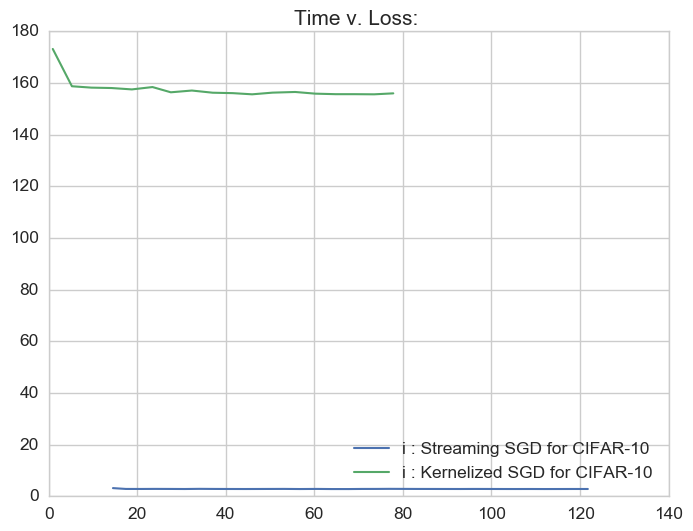

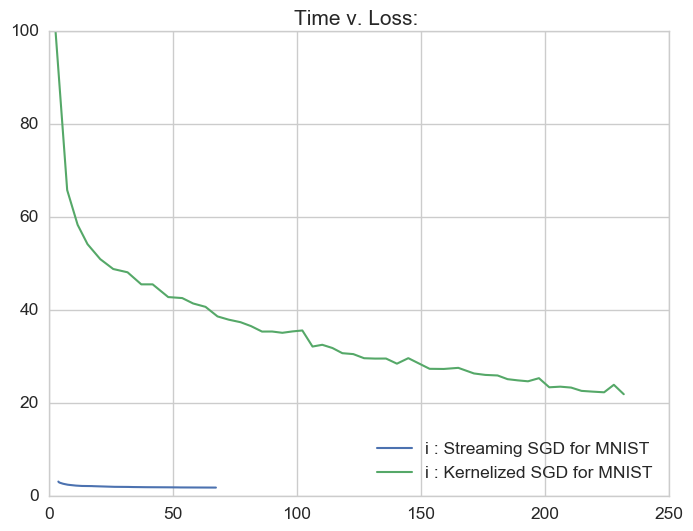

In [46]:
plot_time_v_loss(0, 2)  # CIFAR-10
plot_time_v_loss(2, 4)  # MNIST